# Assignement 2 Report

#### Anja Deric and Karan Soni

### ABSTRACT

For this assignment, we continued with our creation of a database for flights and airports. We used the data from our previous assignemt (gathered using a web scraper, raw csv files, and an API) and expanded upon it. The original data from the last assignment contained information about world's top 30 airports and 47 different flight routes. The flight table had attdibutes of flight ID, departure airport, arrival airport, airline code, and departure and arrival times. The airport table, on the other hand, contained information about the airport code, name, longitude, latitude, altitude, timezone, and half-year passenger count. In this assignment, we expanded upon this by adding 1 more entity- airlines. We then altered all of our tables to be in the 3rd normal form by removing any repeating groups, making sure all columns are signle valued, each entity had a primary key, and there were no partial or translational dependencies. This report summarizes the steps we took to achieve this, as well as provides our final results, which are 3 different tables/entitties containing air travel information.

Image below depicts the overall conceptual model for our database.

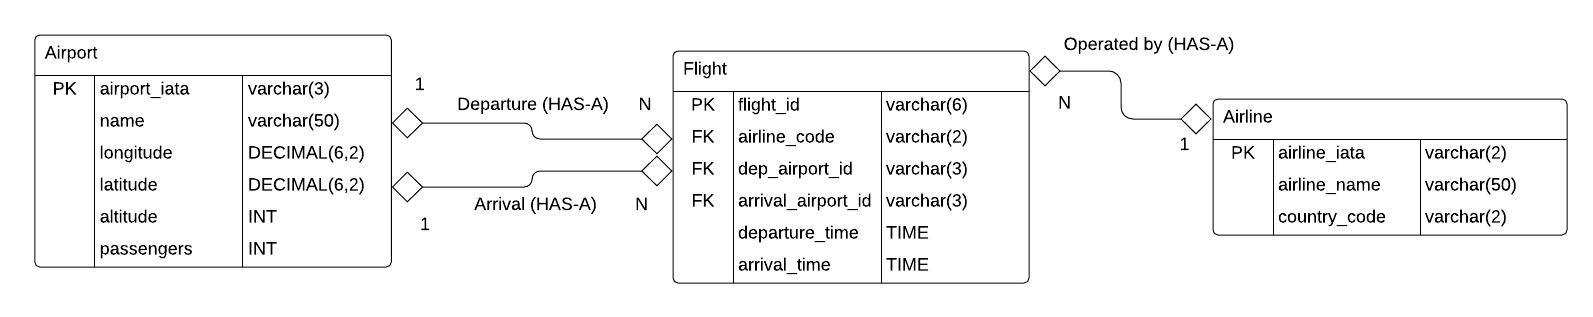

In [36]:
from IPython.display import Image
Image(r'C:\Users\anja\Documents\INFO6210\UMLmodel.jpeg')

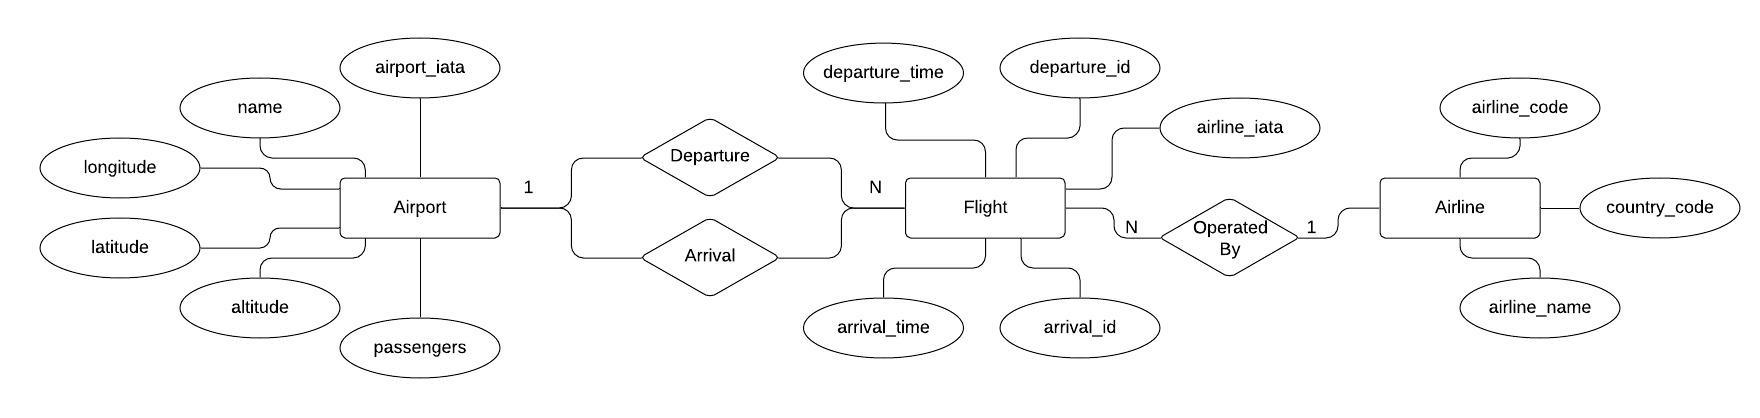

In [2]:
from IPython.display import Image
Image(r'C:\Users\anja\Documents\INFO6210\ConceptualModel.jpeg')

In [3]:
import requests
import json
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup

### Airport Table

For majority of this assignment, we decided to use data from our previous assignment. We started by loading in the airport table we made in the last assignment and checking to make sure it still had all the right attributes.

In [4]:
# Load in previously made airports table
airports = pd.read_csv(r'C:\Users\anja\Documents\INFO6210\top_airports.csv')
airports.head()

,Unnamed: 0,ICAO,IATA,name,city,country,longitude,latitude,altitude,timezone,Rank,half_year_count
0,0,CYYZ,YYZ,Lester B. Pearson International Airport,Toronto,Canada,43.677200,-79.630600,569,America/Toronto,30,24463000
1,1,EDDF,FRA,Frankfurt am Main Airport,Frankfurt,Germany,50.033333,8.570556,364,Europe/Berlin,15,33644000
2,2,EGLL,LHR,London Heathrow Airport,London,United Kingdom,51.470600,-0.461941,83,Europe/London,7,38750000
3,3,EHAM,AMS,Amsterdam Airport Schiphol,Amsterdam,Netherlands,52.308601,4.763890,-11,Europe/Amsterdam,14,34537000
4,4,LEBL,BCN,Barcelona International Airport,Barcelona,Spain,41.297100,2.078460,12,Europe/Madrid,29,24821000


#### 1st Normal Form
To put the table in the 1st normal form, we had to make sure it has a primary key unique to each entry, no multiple values are found in a single column, and there are no repeating groups.

To ensure this, we started by checking our primary key, the IATA airport code to make sure it is unique, which we confirmed it was.

In [5]:
airports['IATA'].is_unique

True

In addition, we checked the count of entries in each attribute to make sure the columns are all single valued.

In [6]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
Unnamed: 0         30 non-null int64
ICAO               30 non-null object
IATA               30 non-null object
name               30 non-null object
city               30 non-null object
country            30 non-null object
longitude          30 non-null float64
latitude           30 non-null float64
altitude           30 non-null int64
timezone           30 non-null object
Rank               30 non-null int64
half_year_count    30 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 2.9+ KB


Next, to make sure no goups were repeating, we checked column names of the data frame.

In [7]:
airports.columns

Index(['Unnamed: 0', 'ICAO', 'IATA', 'name', 'city', 'country', 'longitude',
       'latitude', 'altitude', 'timezone', 'Rank', 'half_year_count'],
      dtype='object')

Since IATA and ICAO codes serve the same purpose and they are just different conventions, we decided to only keep one of them- the IATA codes- and drop the ICAO codes. We decided that all other attributes are different and should thus stay. Below is a preview of our table in 1st normal form.

In [8]:
airports.drop(['ICAO'], inplace=True, axis = 1)
airports.head()

,Unnamed: 0,IATA,name,city,country,longitude,latitude,altitude,timezone,Rank,half_year_count
0,0,YYZ,Lester B. Pearson International Airport,Toronto,Canada,43.677200,-79.630600,569,America/Toronto,30,24463000
1,1,FRA,Frankfurt am Main Airport,Frankfurt,Germany,50.033333,8.570556,364,Europe/Berlin,15,33644000
2,2,LHR,London Heathrow Airport,London,United Kingdom,51.470600,-0.461941,83,Europe/London,7,38750000
3,3,AMS,Amsterdam Airport Schiphol,Amsterdam,Netherlands,52.308601,4.763890,-11,Europe/Amsterdam,14,34537000
4,4,BCN,Barcelona International Airport,Barcelona,Spain,41.297100,2.078460,12,Europe/Madrid,29,24821000


#### 2nd normal form
To put our table in 2nd normal form, we had to ensure there were no partial dependencies and no calculated data.

Since our primary key is composed of a single attribute, there were no partial dependencies observed. As for calculated data, we decided to remove a few more columns from the table. Since longitude and latitude can be used to find the city and country of an airpot, we decided to remove those 2 attributes. Additionally, since rank of the airport is directly related to its half-year passenger count, we decided to remove rank as well (can be calculated by ranking the airports based on passanger counts).

In [9]:
airports.drop(['city','country','Rank'], inplace=True, axis = 1)

In [10]:
airports.head()

,Unnamed: 0,IATA,name,longitude,latitude,altitude,timezone,half_year_count
0,0,YYZ,Lester B. Pearson International Airport,43.677200,-79.630600,569,America/Toronto,24463000
1,1,FRA,Frankfurt am Main Airport,50.033333,8.570556,364,Europe/Berlin,33644000
2,2,LHR,London Heathrow Airport,51.470600,-0.461941,83,Europe/London,38750000
3,3,AMS,Amsterdam Airport Schiphol,52.308601,4.763890,-11,Europe/Amsterdam,34537000
4,4,BCN,Barcelona International Airport,41.297100,2.078460,12,Europe/Madrid,24821000


#### 3rd Normal Form
For 3rd normal form, we had to eliminate any transitive dependencies. Since all of our attributes depended directly on the airport in question, we determined that the table did not need any further editing and was already in 3rd normal form.

#### Auditing
Lastly, to audit our data, we checked to make sure there were no null values, ensuring that our data is complete and consistent/uniform.

In [11]:
airports.isnull().any()

Unnamed: 0         False
IATA               False
name               False
longitude          False
latitude           False
altitude           False
timezone           False
half_year_count    False
dtype: bool

In [12]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
Unnamed: 0         30 non-null int64
IATA               30 non-null object
name               30 non-null object
longitude          30 non-null float64
latitude           30 non-null float64
altitude           30 non-null int64
timezone           30 non-null object
half_year_count    30 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 2.0+ KB


Additionally, to match our conceptual/ER model, we made sure that all decimals in our data frame are rounded to 2 decimals points, as our diagram indicates.

In [13]:
airports.round(2)

,Unnamed: 0,IATA,name,longitude,latitude,altitude,timezone,half_year_count
0,0,YYZ,Lester B. Pearson International Airport,43.68,-79.63,569,America/Toronto,24463000
1,1,FRA,Frankfurt am Main Airport,50.03,8.57,364,Europe/Berlin,33644000
2,2,LHR,London Heathrow Airport,51.47,-0.46,83,Europe/London,38750000
3,3,AMS,Amsterdam Airport Schiphol,52.31,4.76,-11,Europe/Amsterdam,34537000
4,4,BCN,Barcelona International Airport,41.30,2.08,12,Europe/Madrid,24821000
5,5,MAD,Adolfo Suárez Madrid–Barajas Airport,40.47,-3.56,1998,Europe/Madrid,29284000
6,6,CDG,Charles de Gaulle International Airport,49.01,2.55,392,Europe/Paris,36339000
7,7,DXB,Dubai International Airport,25.25,55.36,62,Asia/Dubai,41278000
8,8,HND,Tokyo Haneda International Airport,35.55,139.78,35,Asia/Tokyo,41435000
9,9,HKG,Hong Kong International Airport,22.31,113.92,28,Asia/Hong_Kong,37800000


To audit for validity and accuracy of our data, we checked to make sure all our primary keys were 3-letter strings, and the longitude and latitude fell between -90/90 and -180/180 degrees respectively (convention).

In [14]:
# Test validity of airport code and longitude/latitude
valid_airport_code = True
valid_long = True
valid_lat = True

for airport in range(0,len(airports['IATA'])):
    # Airport code should be 3 characters, letters only
    if len(airports['IATA'][airport]) !=3 or airports['IATA'][airport].isalpha()==False:
        valid_airport_code = False
    # Longitude should be between -90 and 90 degrees
    if airports['longitude'][airport] > 90 or airports['longitude'][airport] < -90 :
        valid_long = False  
    # Latitude should be between -180 and 180 degrees
    if airports['latitude'][airport] > 180 or airports['latitude'][airport] < -180 :
        valid_lat = False  
        
print(valid_airport_code)
print(valid_long)
print(valid_lat)

True
True
True


After completing all of these steps, our data was in 3rd Normal Form and checked thorougly for completeness, uniformity, and validity. We were now ready to complete the same process with our flight and ariline tables as well.

### Flights Table

We started the process by once again pulling in a previously-generated data about flights.

In [15]:
flights = pd.read_csv(r'C:\Users\anja\Documents\INFO6210\flights.csv')
flights.head()

,flight_id,dep_airport_iata,arrival_airport_iata,airline_iata,departure_time,departure_timezone,arrival_time,arrival_timezone
0,WN5176,ATL,DEN,WN,11:00:00,America/New_York,12:35:00,America/Denver
1,DL2269,ATL,DFW,DL,10:57:00,America/New_York,12:25:00,America/Chicago
2,WS6649,ATL,DFW,WS,10:57:00,America/New_York,12:25:00,America/Chicago
3,AR7008,ATL,DFW,AR,10:57:00,America/New_York,12:25:00,America/Chicago
4,NK404,ATL,LAX,NK,10:50:00,America/New_York,13:00:00,America/Los_Angeles


#### 1st Normal Form
To put the table in the 1st normal form, we had to make sure it has a primary key unique to each entry, no multiple values are found in a single column, and there are no repeating groups.

To ensure this, we started by checking our primary key, the flight ID to make sure it is unique, which we confirmed it was. We had a total of 45 flights.

In [16]:
print(flights['flight_id'].is_unique)
flights.flight_id.nunique(dropna= True)

True


45

In addition, we checked the count of entries in each attribute to make sure the columns are all single valued.

In [17]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
flight_id               45 non-null object
dep_airport_iata        45 non-null object
arrival_airport_iata    45 non-null object
airline_iata            45 non-null object
departure_time          45 non-null object
departure_timezone      45 non-null object
arrival_time            45 non-null object
arrival_timezone        45 non-null object
dtypes: object(8)
memory usage: 2.9+ KB


Next, to make sure no goups were repeating, we checked column names of the data frame.

In [18]:
flights.columns

Index(['flight_id', 'dep_airport_iata', 'arrival_airport_iata', 'airline_iata',
       'departure_time', 'departure_timezone', 'arrival_time',
       'arrival_timezone'],
      dtype='object')

Since all attributes were unique and different from each other, the table was already in 1st normal form.

#### 2nd normal form
To put our table in 2nd normal form, we had to ensure there were no partial dependencies and no calculated data.

Since our primary key is composed of a single attribute, there were no partial dependencies observed. As for calculated data, we decided to remove a few columns from the table. Since airport codes for departure and arrival are already provided, one could use that information to find out what timezone the flihgt is departing from or arriving into. As a result, we decided to remove the timezone information from our table.

In [19]:
flights.drop(['departure_timezone','arrival_timezone'], inplace=True, axis = 1)
flights.head()

,flight_id,dep_airport_iata,arrival_airport_iata,airline_iata,departure_time,arrival_time
0,WN5176,ATL,DEN,WN,11:00:00,12:35:00
1,DL2269,ATL,DFW,DL,10:57:00,12:25:00
2,WS6649,ATL,DFW,WS,10:57:00,12:25:00
3,AR7008,ATL,DFW,AR,10:57:00,12:25:00
4,NK404,ATL,LAX,NK,10:50:00,13:00:00


#### 3rd Normal Form
For 3rd normal form, we had to eliminate any transitive dependencies. Since all of our attributes depended directly on the airport in question, we determined that the table did not need any further editing and was already in 3rd normal form.

#### Auditing
Lastly, to audit our data, we checked to make sure there were no null values, ensuring that our data is complete and consistent/uniform.

In [20]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
flight_id               45 non-null object
dep_airport_iata        45 non-null object
arrival_airport_iata    45 non-null object
airline_iata            45 non-null object
departure_time          45 non-null object
arrival_time            45 non-null object
dtypes: object(6)
memory usage: 2.2+ KB


In [21]:
flights.isnull().any()

flight_id               False
dep_airport_iata        False
arrival_airport_iata    False
airline_iata            False
departure_time          False
arrival_time            False
dtype: bool

In [22]:
flights.shape

(45, 6)

To audit for validity and accuracy of our data, we checked to make sure all our primary keys were 5-letter strings(alphanumeric), and the hours, minutes, and seconds of the time attributes were valid as well (convention).

In [23]:
# Test validity of departure and arrival times
valid_times = True
for flight in range(0,len(flights['flight_id'])):
    # Split departure times into hours, minutes, and seconds
    dep_time_full = flights['departure_time'][flight].split(':')
    dep_hour = int(dep_time_full[0])
    dep_min = int(dep_time_full[1])
    dep_sec = int(dep_time_full[2])
    
    # Split arrival times into hours, minutes, and seconds
    arrival_time_full = flights['arrival_time'][flight].split(':')
    arrival_hour = int(arrival_time_full[0])
    arrival_min = int(arrival_time_full[1])
    arrival_sec = int(arrival_time_full[2])
    
    # Make sure all variables are within expected range
    if 0<=dep_hour<=23 == False or 0<=dep_min<=59 == False or 0<=dep_sec<=59 == False:
        valid_times = False
        
    if 0<=arrival_hour<=23 == False or 0<=arrival_min<=59 == False or 0<=arrival_sec<=59 == False:
        valid_times = False

print(valid_times)

True


Our flights table was now in 3rd normal form, and we were ready to create our last table, the airline table.

### Airline Table

We did not previously make a table to store airline data, so we had use an API once again to gather some extra information. We started off by defining parameters of our search and making an API request.

In [24]:
# Define earch parameters for request
params = {
    'access_key': '21a3ed98c94fcf48fac648f24e8541c4',
    'limit': 100
}

In [25]:
# Make an API request and convert data to json
api_response = requests.get('http://api.aviationstack.com/v1/airlines', params)
all_airline_data = api_response.json()

As in the previous assignment, we then moved all the data into arrays in roder to be converted into a dictionary.

In [26]:
# Make empty arrays to store data
airline_iata, airline_name, country_code = [], [], []

for airline in all_airline_data['data']:
    # Add airline information to arrays
    airline_iata.append(airline['iata_code'])
    airline_name.append(airline['airline_name'])
    country_code.append(airline['country_iso2'])

After moving everything into a dictionary, we were able to convert the data into a dataframe format and we were ready to normilize and audit it.

In [27]:
# Create dictionary from data arrays
airline_data = {'airline_iata': airline_iata,
               'airline_name': airline_name,
               'country_code': country_code}

# Convert to data frame
airlines = pd.DataFrame(airline_data)
airlines.head()

,airline_iata,airline_name,country_code
0,AA,American Airlines,US
1,DL,Delta Air Lines,US
2,UA,United Airlines,US
3,WN,Southwest Airlines Co.,UM
4,CZ,China Southern Airlines,CN


#### 1st Normal Form
To put the table in the 1st normal form, we had to make sure it has a primary key unique to each entry, no multiple values are found in a single column, and there are no repeating groups.

To ensure this, we started by checking our primary key, the airline IATA code to make sure it is unique, which we confirmed it was. We had a total of 100 airlines in our table.

In [28]:
print(airlines['airline_iata'].is_unique)
airlines.airline_iata.nunique(dropna= True)

True


100

In addition, we checked the count of entries in each attribute to make sure the columns are all single valued.

In [29]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
airline_iata    100 non-null object
airline_name    100 non-null object
country_code    100 non-null object
dtypes: object(3)
memory usage: 2.5+ KB


Next, to make sure no goups were repeating, we checked column names of the data frame.

In [30]:
airlines.columns

Index(['airline_iata', 'airline_name', 'country_code'], dtype='object')

Since all the columns had their own purpose and were unique, our data was now in 1st Normal Form.

#### 2nd normal form
To put our table in 2nd normal form, we had to ensure there were no partial dependencies and no calculated data.

Since our primary key is composed of a single attribute, there were no partial dependencies observed. Same logic followed for caluclated values. This particular table only stored the country base and names of airlines, so no calculated values were observed in the table.

#### 3rd Normal Form
For 3rd normal form, we had to eliminate any transitive dependencies. Since all of our attributes depended directly on the airline in question, we determined that the table did not need any further editing and was already in 3rd normal form.

In [31]:
airlines.head()

,airline_iata,airline_name,country_code
0,AA,American Airlines,US
1,DL,Delta Air Lines,US
2,UA,United Airlines,US
3,WN,Southwest Airlines Co.,UM
4,CZ,China Southern Airlines,CN


#### Auditing
Lastly, to audit our data, we checked to make sure there were no null values, ensuring that our data is complete and consistent/uniform.

In [32]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
airline_iata    100 non-null object
airline_name    100 non-null object
country_code    100 non-null object
dtypes: object(3)
memory usage: 2.5+ KB


In [33]:
airlines.isnull().any()

airline_iata    False
airline_name    False
country_code    False
dtype: bool

To audit the validity of our data, we made sure that all country codes as well as airline codes were 2-letter symbols, which is the convention for both.

In [34]:
# Test validity of airport code and longitude/latitude
valid_airline_code = True
valid_country_code = True

for airline in range(0,len(airlines['airline_iata'])):
    # Airline code should be 2 characters, alphanumeric
    if len(airlines['airline_iata'][airline]) !=2 or airlines['airline_iata'][airline].isalnum()==False:
        valid_airline_code = False
    # Country code should be 2 characters, letters only
    if len(airlines['country_code'][airline]) !=2 or airlines['country_code'][airline].isalpha()==False:
        valid_country_code = False
        
print(valid_airline_code)
print(valid_country_code)

True
True


After this, all of our tables were in 3rd Normal Form and audited for accuracy, completenes, and uniformity. As a last step, we exported all the tables to csv files.

In [35]:
# Export all data to csv file
export_flight_data = flights.to_csv(r'C:\Users\anja\Documents\INFO6210\flights_normalized.csv')
export_airport_data = airports.to_csv(r'C:\Users\anja\Documents\INFO6210\airports_normalized.csv')
export_airline_data = airlines.to_csv(r'C:\Users\anja\Documents\INFO6210\airlines_normalized.csv')

### Data Audit Process

To audit our data, we followed a process very similar to our last assignment. The 3 sections below summarize how the additional data we imported was audited for validity, completeness, and consistency/uniformity

#### Validity/Accuracy
To asses the validity and accuracy of our data, we used functions like isnull(), which confirmed that none of the values in our data were null. For most of our data, we didn't have to delete any rows or columns since none of the data we collected had any null values.

Additionally, depending on which attribute we were looking at, we wrote tests to enure that they follow a standard form in order to determine their accuracy. For example, when looking at airline codes, we tested to make sure they were a 2-character strings. We followed a similar procedure for flight IDs, flight times, airport codes, and longitude/latitude data. 

#### Completeness
To assess the completeness of our data, we used the info() function, which showed how many items each of our data columns contained. Since we knew how many rows of data we were importing, we were able to confirm that every column had the appropriate number of entries.

As described in the section above, we also used the isnull() function to make sure no null values were present in our data, which also served as comfirmation that all of our data was complete, and our rows and columns weren't just filled with empty values.

#### Consistency/Uniformity
We were also able to determine that our data was consistent and uniform by connecting items from the different data sets through foreign keys. For instance, every flight had a code for the departing and arrival airport, which is a foreign key to the airport IATA code in the airports table. 

### REPORT
Troughout this report, we used functions such as isnull(), info() and is_unique to confirm that our data was in 3rd Normal Form, as well as audit the data for accuracy, consistency, and completeness. In addition, we used the drop function to remove any colums that were calculated or did not depend on the primary key in order to put all tables in 3NF.

Questions:
1. What are the ranges, data types and format of all of the attributes in your entities?
Our data base has 3 separate entities- flight, airport, and airline. Each entity has a few corresponding attributes that store information about it. Listed below are all attributes of all entities in our database and their respective types.
    - Entity: flight
        - flight_id: varchar(6), 6-character string that represent the flight number
        - dep_airport_id: varchar(3), a 3-character airport code composed fully of letters
        - arrival_airport_id: varchar(3), a 3-character airport code composed fully of letters
        - airline_code: varchar(2), a 2-character airline code
        - departure_time: TIME, stores value of scheduled departure time in 24-hour clock time
        - arrival_time: TIME, stores value of scheduled arrival time in 24-hour clock time 
    - Entity: airport
        - airport_icao: varchar(4), a 4-character airport code composed fully of letters
        - name: varchar(50), full name of the airport
        - longitude: varchar(3), a 3-character airline code composed fully of letters
        - latitude: TIME, stores value of scheduled departure time in 24-hour clock time (ranges from -90 to 90 degrees)
        - altitude: TIME, stores value of scheduled arrival time in 24-hour clock time (ranges from -180 to 180 degrees)
        - rank: INT, number from 1 to 30 of to signify aiport's spot in world's top 30 busiest airports
        - passengers: INT, number of passengers going through the eirport in half a year's time as an integer
    - Entity: airline
        - airline_iata: varchar(2), a 2-character airline code
        - name: varchar(50), full name of the airline
        - country_code: varchar(2), country code for where the airline is based out of


2. When should you use an entity versus attribute? (Example: address of a person could be
modeled as either)

An entity represents an object, whereas attributes are used to describe that object. For our particular database, we chose entities and attributes so as to make sure that attributes are simply there to tell us more information about the entity and wouldn't really make sense to be entities on their own. For instante, the airport and airline codes were all used as attributes since they are all used to describe their respective entities. These codes would have no meaning on their own unless tied to their specific entity. This strategy led us to chose which things to consider attributes, and which to consider entitites. For an airport data base, the most important things and objects (whether physical or conceptual) that would make up the database would be the flights, the airports, and the airline. If we were to expand our database, we could potentially add customers and orders as two more entities, which would have attributes of their own such as name and order number.


3. When should you use an entity or relationship, and placement of attributes? (Example: a
3 manager could be modeled as either)

We chose to define our entities and relationships based on the HAS-A model. Whenever we had such a relationship, wemade the two concepts or objects an entity instead of a relationship. Whenever two entities could be connected with a verb, we decided that the verb would be a relationship (ex. peson A manages person B), whereas objects and concepts themselves would be defined as entitties (ex. paerson A is a manager, person B is an employee).

4. How did you choose your keys? Which are unique?

We chose all our keys based on the most unique and descriptive attribute of each of our entities. For an airport, the IATA code is a 3-character code assigned to each airport that is unique to each airport, and it was therefore a natural primary key. We used a similar strategy to define our airline keys. These keys are all unique for each instance of the entity.
To chose a key for a flight entity, we used the flight ID number, which is also unique to each flight route is actually composed of the combination of airline code and flight number. 


5. Did you model hierarchies using the “ISA” design element? Why or why not?

Our database model only contains HAS-A relationships as opposed to IS-A. We decided to do this because the entities we picked are all "objects" that have independent functions in our model. The 3 entities we chose to have are airlines, airports, and flights, so they are all connected with HAS-A design elements. We could've added some IS-A design elements by for example adding aircraft and airplane information, since each airplane owned by an airline is a specific type of aircraft (ex. Boeing). However, based ont he entities we chose, HAS-A relationships made more sense.

6. Were there design alternatives? What are their tradeoffs: entity vs. attribute, entity vs.
relationship, binary vs. ternary relationships?

One design alternative we considered was keeping airline_id as an attribute for all flights without adding an a separate entity for it. In this case we chose to add a separete entity for airlines since there is more information that can be given about an airline apart from its code. As a result, we ended up with one additional data table in the end, which is a tradeoff we chose to make. 

In terms of entity vs. relationship, we went back and forth on choosing whether to add separate entities for flight departure and flight arrival instead of keeping the two just as relationships between flights and airports. We chose to stick with only having flights and airports as entities since that kept out database simple without sacrificing any extra information. If the number of attributes we had for departures and arrivals was a large quantity, then separating those ralationships into attributes could've potentially been a better design choice.

Our database contains only binary relationships since we chose to only have 3 attributes and airports and airlines don't neccessarily have a direct relationship (only have a relationship through flight routes). We potentially could've added information about the specific airport which is the home base of each airline, but that information was not accessible through the API we used. This design choice would've resulted in a more complex design overall, but the relationship between each entity would've been better defined.

7. Where are you going find real-world data populate your model?

Since we are using the same domain from the previous assignment, we used the same data sources as well. To populate our model we used web scraping to gather flight rank and passenger information about top 30 airports, we used a raw csv file to gather latitude, longitude, and altitude data on each airport, and we used the aviationstack API to gather data on flight routes and airlines. Links to each source are provided below.

- API Used: [aviationstack API](https://aviationstack.com/documentation)

- Website Used: [Top 30 Airports in the World](https://www.world-airport-codes.com/world-top-30-airports.html)

- .CSV File Used:[Open FLights Airport Data Set](https://openflights.org/data.html#airport)


Physical:
1. Are all the tables in 1NF?

All tables are in 1NF. Each table has a primary key (marked PK in our diagrams) which uniquely identifies each entry in each table, all attributes are signle-valued, and there are no repeating groups. We ensured this by removing some columns from our tables. For instance, we removed all ICAO codes for flights, airports, and airlines since those serve the same purpose as IATA codes, but are just a different convention. In addition, we used the isnull() command to make sure all primary keys we used were, in fact, unique. None of the values in our data tables were multi-valued, so we didn't have to address that issue in our database.


2. Are all the tables in 2NF?

All tables are in 2NF since there are no partial dependencies and no calculated values. In order to ensure this, we removed some columns from our tables. For instance, in the airport table, we removed the country and city that the airport is located in since those can be extracted by looking at the longitude and latitude of the airport. In addition, we removed the timezone from all of our flight enties since the airport that the flight is arriving to or departing from has a timezone assigned to it already in the airport database. We did not have any issues with partial dependencies since all of our primary keys consisted of a signle attributes and not a combination.


3. Are all the tables in 3NF?

All tables are in 3 NF since there are no transitive dependencies. We ensured that every attribute in the table directly depends on the primary key of that particular table entry.

### CONCLUSION
The primary focus of this assignment was learning how to normalize a database in order to avoid redundancies and remove unneccesary information. We expanded upon our database from assignment 1, but we mainly focused on taking that data and normalizing it. The report above summarizes how each table was put into 1st, 2nd, and 3rd normal form. In the end, we ended up with 4 different data tables for airports, flight routes, airlines, and aircrafts. The entities are all related to each other and together form a small database of air travel information.

### CONTRIBUTION
On our own: 85%

External Source (TAs): 5% (help with ER diagram, Assignment 1 sample)

External Source (API Documentation): 5% (getting data from API)

Provided by Professor:  5%

### CITATIONS

https://aviationstack.com/documentation (API Documentation- help with creating API requests)

TA Assignment 1 Sample (audit functions like is_null(), info(), etc.; merge function; image display)

### LICENSE
Copyright 2019 Anja Deric, Karan Soni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.